# Self-Driving Car Engineer Nanodegree

## Project: **Advanced Lane Finding** 

### 04.Use to correctly rectify each image to a "birds-eye view"

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
%matplotlib inline

### Load Camera parameters for Pkl

In [2]:
import pickle
fh = open('Camera_parameters.pkl', 'rb')
mtx = pickle.load(fh)
dist = pickle.load(fh)
fh.close()

In [3]:
def unwarp(img):
    image_size = (img.shape[1], img.shape[0])
    src = np.float32([(585,460),
                  (700,460), 
                  (260,680), 
                  (1000,680)])

    dst = np.float32([(300,0),
                      (image_size[0]-300,0),
                      (300,image_size[1]),
                      (image_size[0]-300,image_size[1])])
    img_size = (img.shape[1], img.shape[0])
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
    M = cv2.getPerspectiveTransform(src, dst)
    
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, M, Minv

### Load each undistorted image and Use transforms .

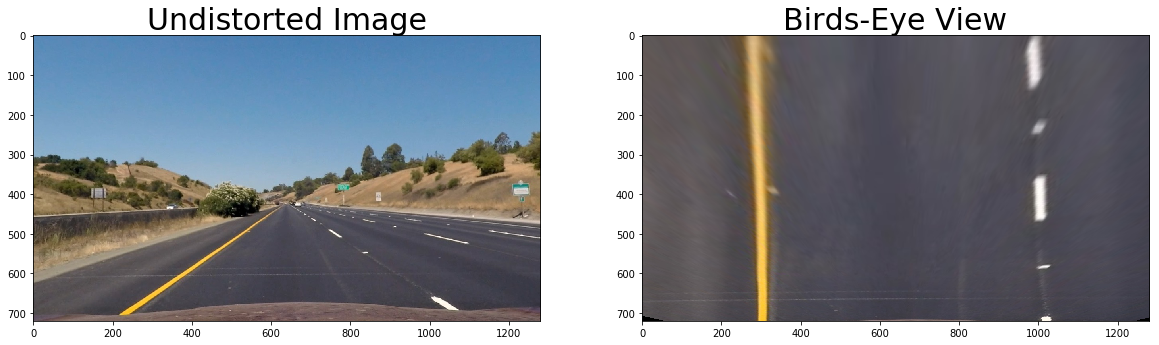

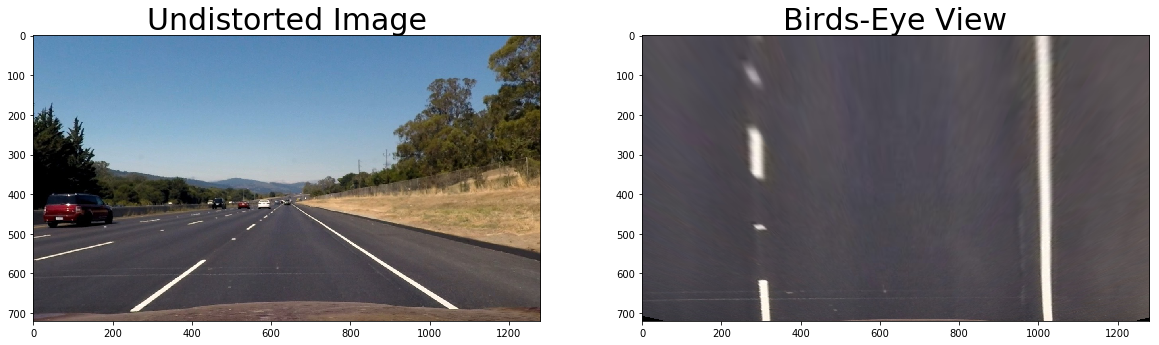

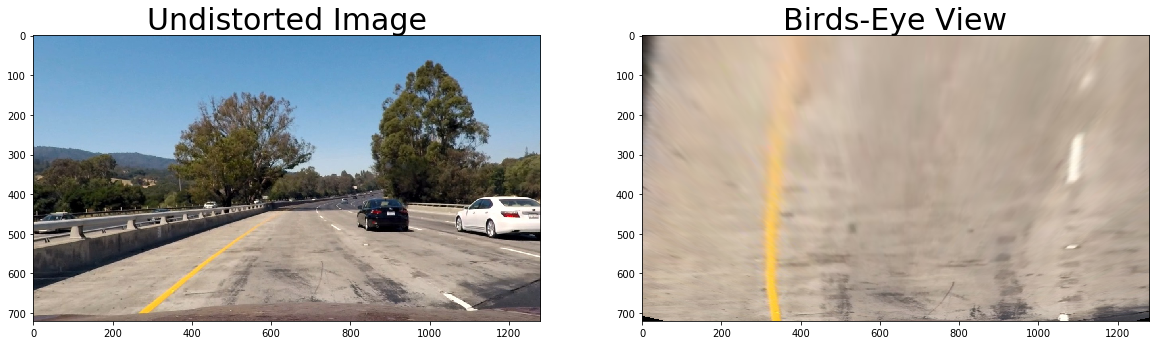

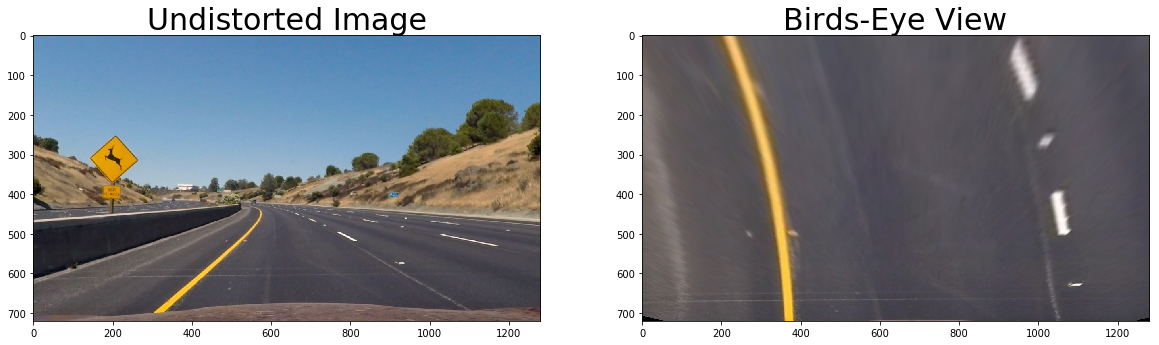

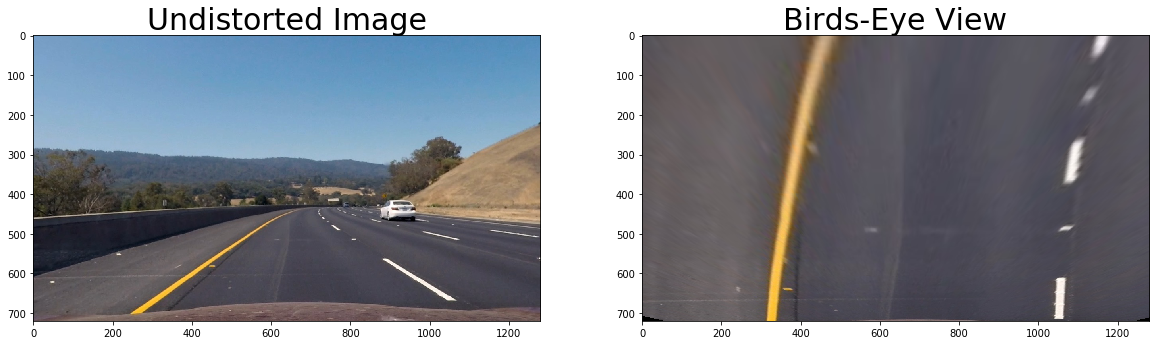

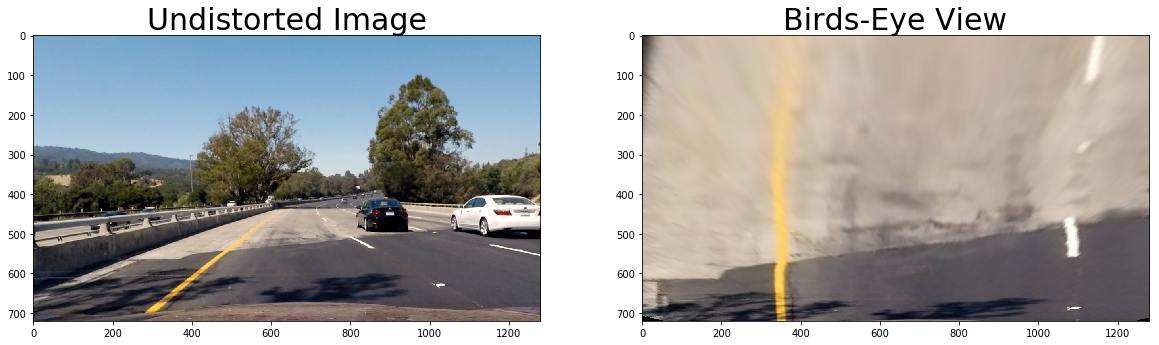

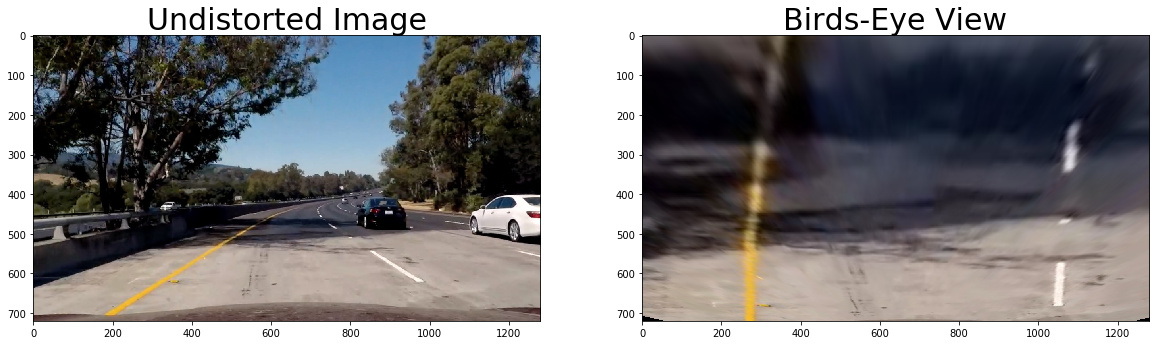

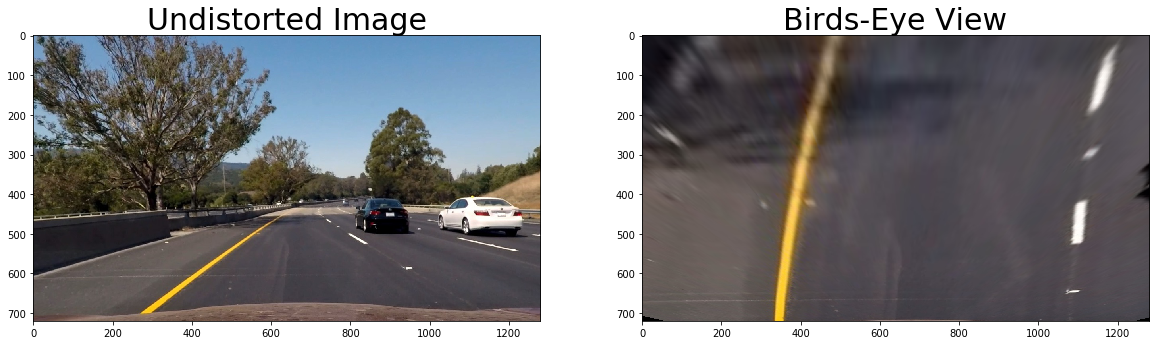

In [4]:
for image_name in os.listdir("output_images/Undistorted_Image/"):
    #read in each image
    image = mpimg.imread("output_images/Undistorted_Image/" + image_name)
    unwarp_image, M, Minv = unwarp(image)
    #Show Result
    fig, axs = plt.subplots(1,2, figsize=(20, 20))
    axs = axs.ravel()

    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Undistorted Image', fontsize=30)
    axs[1].imshow(unwarp_image, cmap='gray')
    axs[1].set_title('Birds-Eye View', fontsize=30)
    #Save image
    try:
        mpimg.imsave("output_images/Birds_Eye_View/" + image_name,unwarp_image)
    except FileNotFoundError:
        os.mkdir("./output_images/Birds_Eye_View/")
        mpimg.imsave("output_images/Birds_Eye_View/" + image_name,unwarp_image)